In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyIGRF as igrf
import utm
from scipy.signal import hilbert
from scipy.interpolate import griddata

In [2]:
# Reading the gravity data from the directory
grav_data = pd.read_csv('Magnetic_data.csv')
grav_data.head()

,X(easting),Y(northing),elevation,Total magnetic\n intensity(nT),Unnamed: 4,Unnamed: 5
0,406819.80,2196876.79,9,44825.49,NaN,NaN
1,407003.68,2196986.49,7,44677.68,NaN,NaN
2,407138.26,2197004.60,7,44709.26,NaN,NaN
3,407314.71,2197009.05,5,44669.70,NaN,NaN
4,407435.86,2196966.63,7,44656.83,NaN,NaN


In [3]:
X = grav_data.iloc[:,0].values     # Setting X to Easting
Y = grav_data.iloc[:,1].values     # Setting Y to Northing
elevation = grav_data.iloc[:,2].values  
total_intensity = grav_data.iloc[:,3].values # in nT
total_intensity = pd.DataFrame(total_intensity)

In [4]:
lat = []  # latitude
long = [] # longitude
for i in range (0,len(X)):
    temp1 = X[i]
    temp2 = Y[i]
    lat_, long_ = utm.to_latlon(temp1, temp2 ,zone_number=45, zone_letter='N')
    lat.append(lat_)
    long.append(long_)
    

In [5]:
co_ordinates = pd.concat([pd.DataFrame(lat),pd.DataFrame(long),pd.DataFrame(elevation)],axis=1)
co_ordinates.columns =['Latitude', 'Longitude','Elevation']
co_ordinates.head(43)

,Latitude,Longitude,Elevation
0,19.865800,86.110000,9
1,19.866800,86.111750,7
2,19.866970,86.113035,7
3,19.867019,86.114720,5
4,19.866641,86.115879,7
5,19.872155,86.106717,10
6,19.879849,86.101467,10
7,19.886124,86.099178,9
8,19.893325,86.104613,9
9,19.893679,86.104772,9


In [6]:
igrf_intensity = []
for i in range(0,len(X)):
    _, _, _, _, _, _,Total_intenisty_temp = igrf.igrf_value(lat =lat[i], lon = long[i], alt = elevation[i],year = 2020)
    igrf_intensity.append(Total_intenisty_temp)

In [7]:
igrf_intensity = pd.DataFrame(igrf_intensity)
igrf_intensity.columns = ['IGRF Total Intensity']
igrf_intensity.head(43)

,IGRF Total Intensity
0,44180.879111
1,44229.427275
2,44229.586851
3,44277.780177
4,44229.627850
5,44159.504563
6,44162.563082
7,44189.162278
8,44192.707271
9,44192.874488


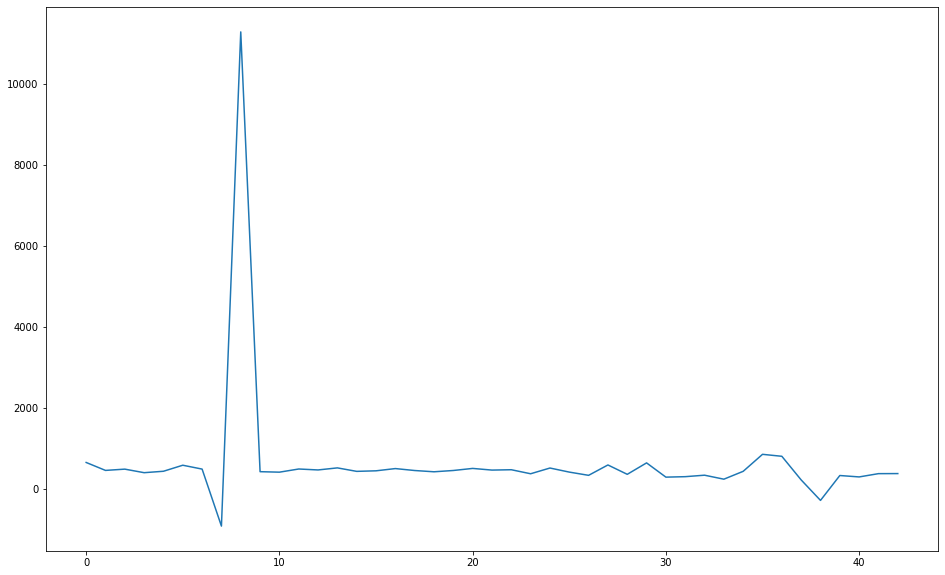

In [23]:
anomaly = np.array(total_intensity)-np.array(igrf_intensity) # Calculating the anomaly
anomaly = anomaly.reshape(43,)
# Plotting the anomaly on 1D 
plt.figure(figsize=(16,10))
plt.plot(range(0,len(anomaly)),anomaly)
plt.show()

In [24]:
# Applying the Hilebert Transform

h1 = hilbert(anomaly) # First hilbert transform
h2 = hilbert(h1.imag) # Second hilbert transform to refine the anomaly better
pole_1 = np.array(h1.imag) 
pole_2 = np.array(h2.imag)

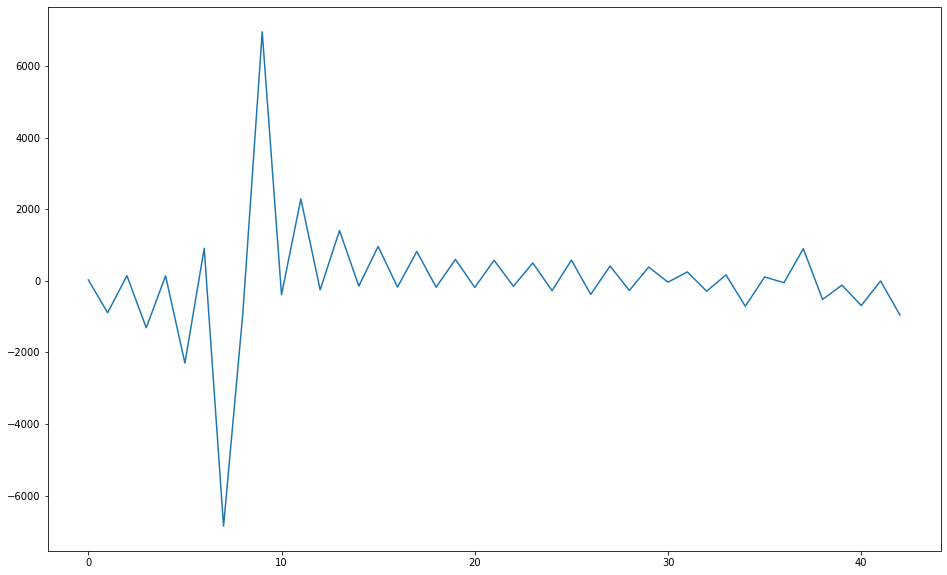

In [26]:
# 1D plot of first hilbert transformation
plt.figure(figsize=(16,10))
plt.plot(range(0,len(pole_1)),pole_1)
plt.show()

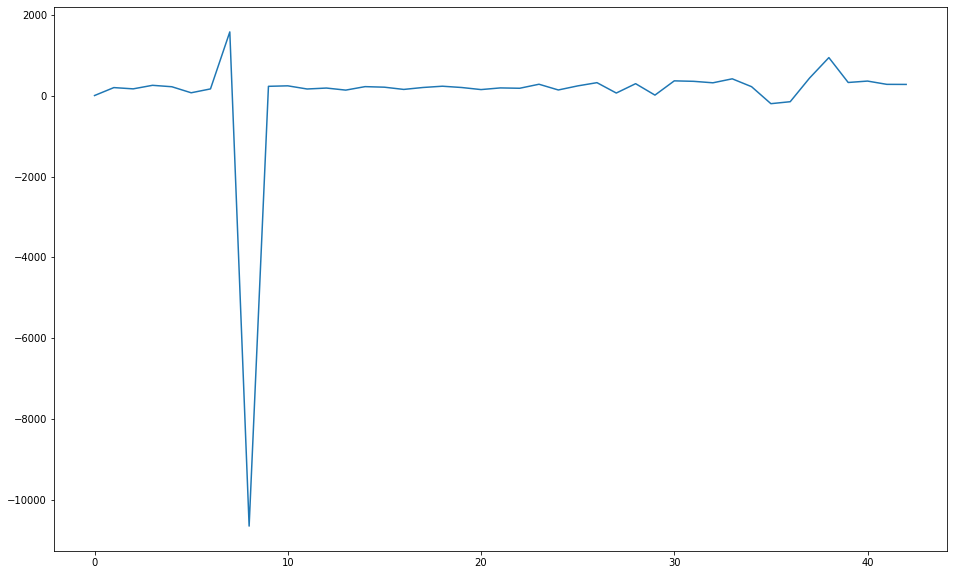

In [28]:
# 1D plot of second hilbert transformation
plt.figure(figsize=(16,10))
plt.plot(range(0,len(pole_2)),pole_2)
plt.show()

In [35]:
# Getting things together 

final_data = pd.concat([pd.DataFrame(lat),pd.DataFrame(long),pd.DataFrame(elevation),pd.DataFrame(total_intensity),pd.DataFrame(igrf_intensity),pd.DataFrame(anomaly),pd.DataFrame(pole_2)],axis=1)
final_data.columns=['Latitude', 'Longitude', 'Altitude', 'Total Intensity', 'Total IGRF Intensity', 'Anomaly', 'RTP Anomaly']
final_data

,Latitude,Longitude,Altitude,Total Intensity,Total IGRF Intensity,Anomaly,RTP Anomaly
0,19.865800,86.110000,9,44825.49,44180.879111,644.610889,2.235049
1,19.866800,86.111750,7,44677.68,44229.427275,448.252725,198.593213
2,19.866970,86.113035,7,44709.26,44229.586851,479.673149,167.172788
3,19.867019,86.114720,5,44669.70,44277.780177,391.919823,254.926115
4,19.866641,86.115879,7,44656.83,44229.627850,427.202150,219.643787
5,19.872155,86.106717,10,44736.03,44159.504563,576.525437,70.320501
6,19.879849,86.101467,10,44643.52,44162.563082,480.956918,165.889020
7,19.886124,86.099178,9,43260.53,44189.162278,-928.632278,1575.478216
8,19.893325,86.104613,9,55484.13,44192.707271,11291.422729,-10644.576791
9,19.893679,86.104772,9,44609.70,44192.874488,416.825512,230.020426


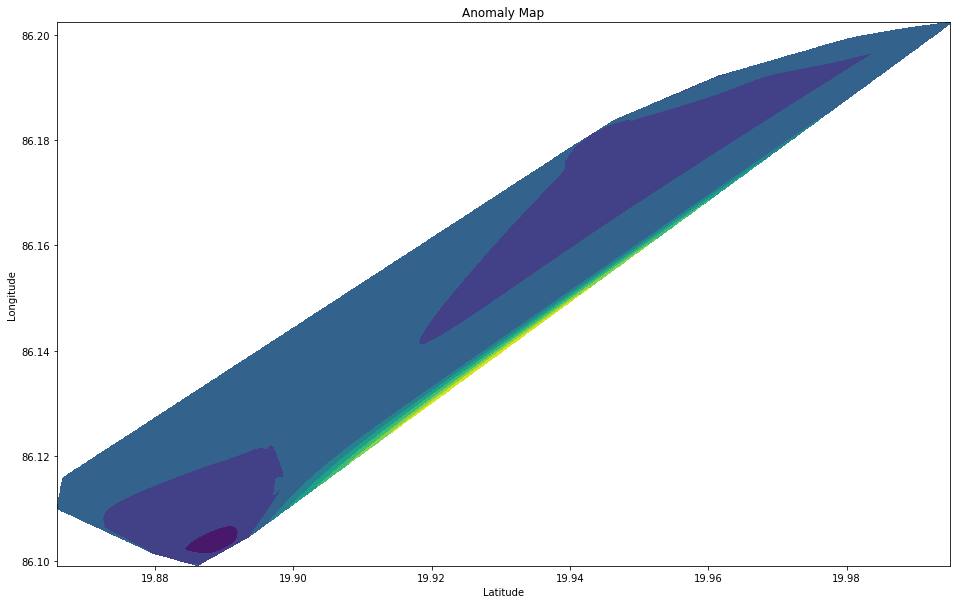

In [37]:
# Plotting the Anomaly Map

x_min = np.array(lat).min()
x_max = np.array(lat).max()
y_min = np.array(long).min()
y_max = np.array(long).max()
x_temp = np.arange(x_min,x_max, 0.0001)
y_temp = np.arange(y_min,y_max, 0.0001)
xx , yy = np.meshgrid(x_temp,y_temp)

Z = griddata( (lat,long), pole_2, (xx, yy), method='cubic')
plt.figure(figsize=(16,10))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Anomaly Map')
plt.contourf(xx, yy, Z)
plt.show()